## Regularized logistic regression ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [3]:
path = 'ex2data2.txt'
data = pd.read_csv(path,header=None,names=['test1','test2','pass'])
data

,test1,test2,pass
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


### 2.2.1 visualizing the data ###

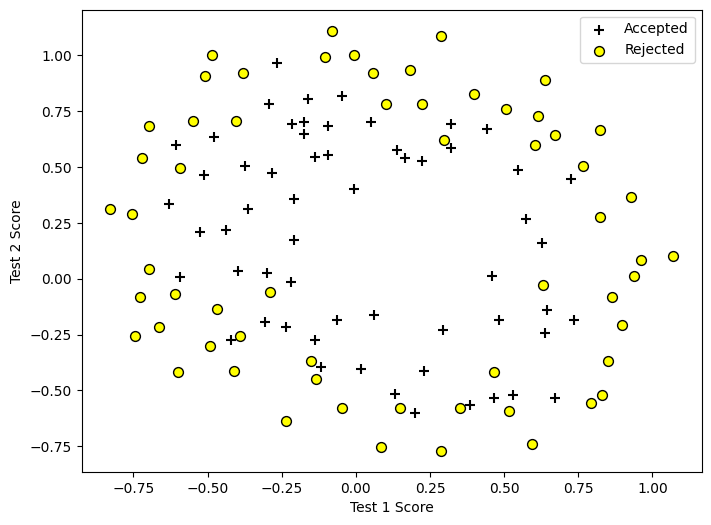

In [4]:
positive = data[data['pass']==1]
negative = data[data['pass']==0]

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['test1'],positive['test2'],s=50,c='black',marker='+',label='Accepted')
ax.scatter(negative['test1'],negative['test2'],s=50,c='yellow',marker='o',label='Rejected',edgecolors='black')
ax.legend(loc='upper right')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

cost

In [16]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta[1:]], 2))
    return np.sum(first - second) / len(X) + reg

In [19]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if i == 0:
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[i])

    
    return grad

In [8]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]
X = data.iloc[:,1:cols]
y = data.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(11)

In [9]:
learningRate = 1

In [13]:
costReg(theta, X, y, learningRate)

ValueError: shapes (118,2) and (11,1) not aligned: 2 (dim 1) != 11 (dim 0)

In [17]:
gradientReg(theta, X, y, learningRate)

ValueError: shapes (118,2) and (11,1) not aligned: 2 (dim 1) != 11 (dim 0)

In [20]:
# 准备数据和多项式特征
degree = 6
X = data[['test1', 'test2']]
y = data['pass']

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# 初始化theta
theta = np.zeros(X_poly.shape[1])

# 学习率
learningRate = 1

# 计算初始的代价和梯度
initial_cost = costReg(theta, X_poly, y, learningRate)
initial_grad = gradientReg(theta, X_poly, y, learningRate)
print(f"Initial Cost: {initial_cost:.3f}")
print(f"Initial Gradient: {initial_grad[:5]}")  # Display first 5 gradients

# 使用优化函数来找到最优参数
result = minimize(fun=costReg, x0=theta, args=(X_poly, y, learningRate), method='TNC', jac=gradientReg)
optimal_theta = result.x


# 绘制决策边界
def plot_decision_boundary(theta, X, y):
    plt.figure(figsize=(8, 6))

    # 绘制数据点
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='black', marker='+', label='Accepted')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='yellow', marker='o', label='Rejected', edgecolors='black')

    # 设置图像显示范围
    u = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    v = np.linspace(X[:, 2].min(), X[:, 2].max(), 50)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = np.dot(poly.fit_transform(np.array([[u[i], v[j]]])), optimal_theta)

    z = z.T
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='blue')

    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='upper right')
    plt.title('Decision Boundary')
    plt.show()


plot_decision_boundary(optimal_theta, X_poly, y)

TypeError: only integer scalar arrays can be converted to a scalar index